# Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grad-CAM Visualization

In [2]:
original = pd.read_csv("Data/data.csv")

original.date = pd.to_datetime(original.date)
original = original.set_index('date')

## Visualize Grad-CAM Each Layer and Features

C:\Temp\ipykernel_5668\3827234277.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(x=np.array(labels)[np.argsort(-nba2)[0:10]], y=-np.sort(-nba2)[0:10], palette='Greens_r')


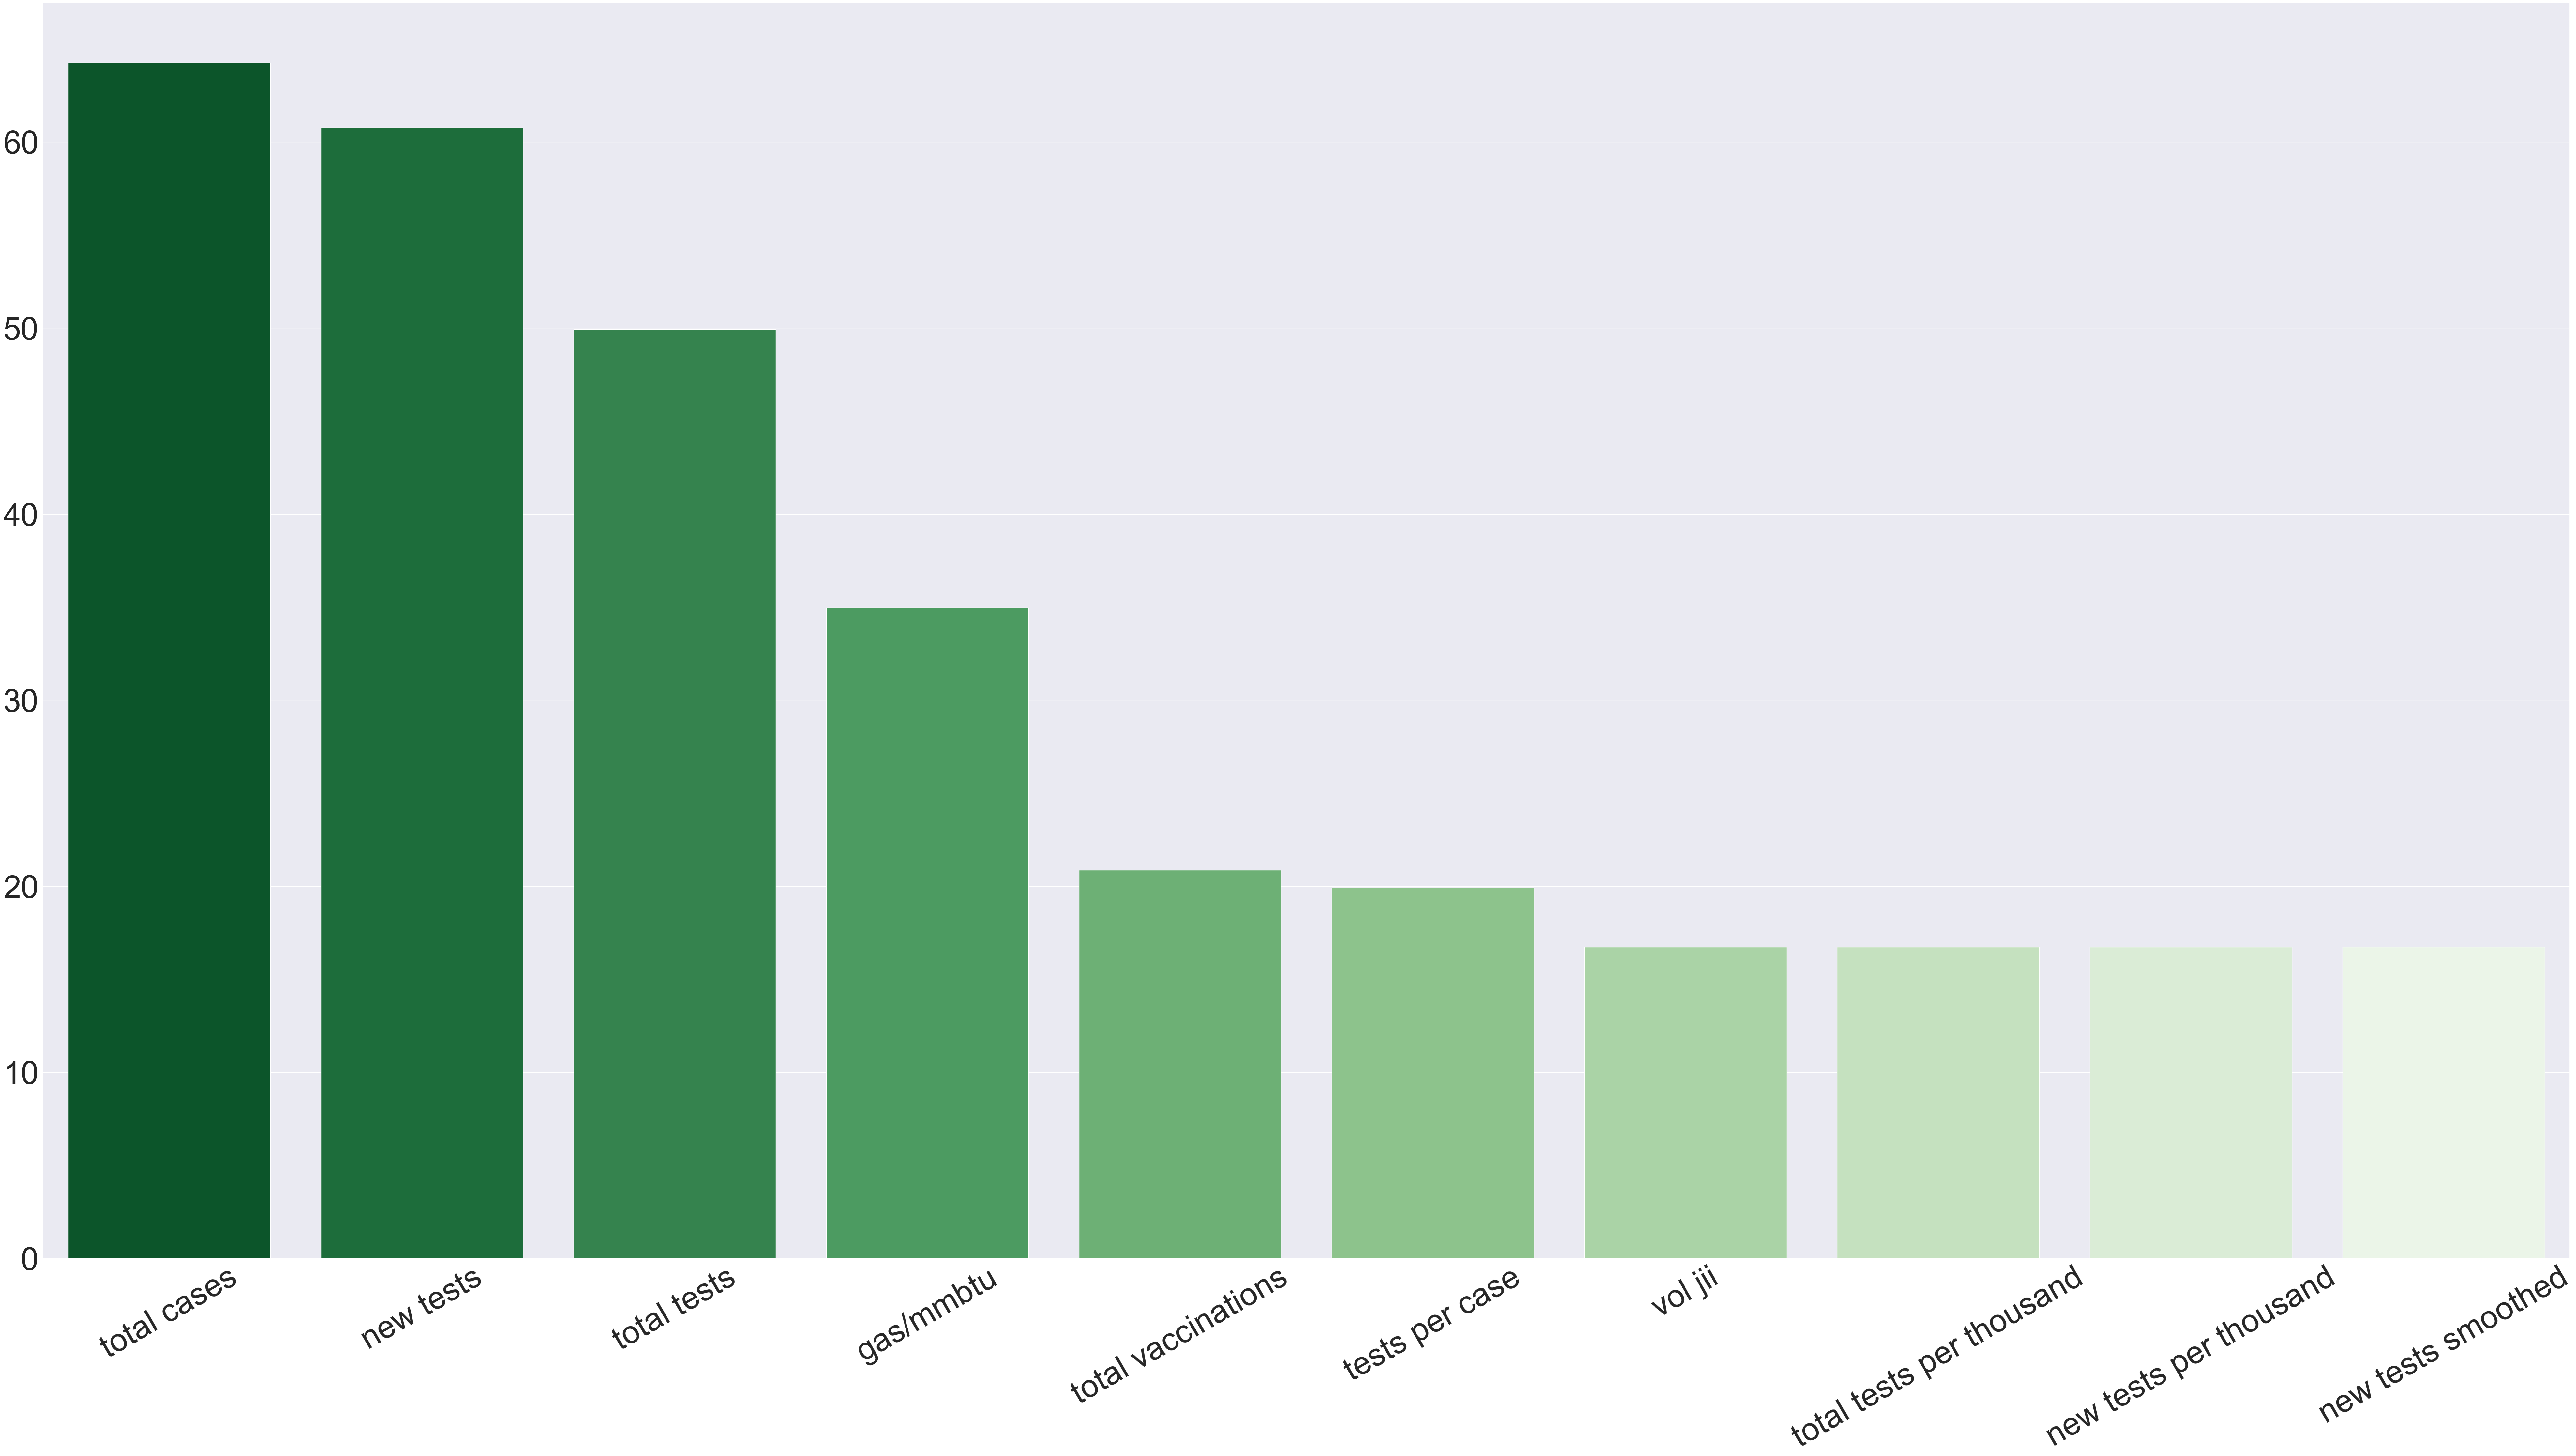

In [4]:
in_dim = 45
layerss = "post"
nba=np.load(f'Result/Grad-CAM/cam_array_{in_dim}_{layerss}.npy')
nba=np.sum(nba,axis=2)/3.0
nba2=np.sum(nba,axis=1)/60*100
nba=pd.DataFrame(nba)

labels = ['jii', 'vol jii', 'ihsg', 'vol ihsg', 'usd', 'eur', 'gold/gr', 'silver/gr', 'oil/bbl', 'gas/mmbtu',
          'total cases', 
          'new cases', 'new cases smoothed', 
          'total deaths', 'new deaths', 'new deaths smoothed', 'total cases per million', 
          'new cases per million', 'new cases smoothed per million', 
          'total deaths per million', 'new deaths per million', 'new deaths smoothed per million', 'reproduction rate', 
          'total tests', 'new tests', 'total tests per thousand', 'new tests per thousand', 'new tests smoothed', 'new tests smoothed per thousand', 
          'positive rate', 'tests per case', 'total vaccinations', 'people vaccinated', 'people fully vaccinated', 'total boosters', 'new vaccinations', 
          'new vaccinations smoothed', 'total vaccinations per hundred', 'people vaccinated per hundred', 'people fully vaccinated per hundred', 
          'total boosters per hundred', 'new vaccinations smoothed per million', 'new people vaccinated smoothed', 
          'new people vaccinated smoothed per hundred', 'stringency index']

a=original.index[-60:].to_numpy() # Index from dataset
a=np.datetime_as_string(a, unit='D')

nba.columns = a

# Attention Map Plot
sns.set(font_scale=4.0)
sns.set_style({"savefig.dpi": 300})
ax = sns.heatmap(nba,  vmin=0.0, vmax=1.0, yticklabels=labels,cmap='jet', linewidths=.1)
ax.xaxis.tick_top()
plt.xticks(rotation=30)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
fig = ax.get_figure()
fig.set_size_inches(125, 75)
#fig.savefig(f"Result/Grad-CAM/grad_cam_{in_dim}_{layerss}.png")

# Rank Plot
plt.figure(figsize=(16,9))
ax2=sns.barplot(x=np.array(labels)[np.argsort(-nba2)[0:10]], y=-np.sort(-nba2)[0:10], palette='Greens_r')
fig2 = ax2.get_figure()
plt.xticks(rotation=30)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
fig2.set_size_inches(100, 50)
#fig2.savefig(f"Result/Grad-CAM/rank_{in_dim}_{layerss}.png")

## Aggregation 45 Features Each Layer

In [4]:
array_grad_post = np.load("Result/Grad-CAM/cam_array_45_post.npy")
array_grad_enc = np.load("Result/Grad-CAM/cam_array_45_enc.npy")
array_grad_dec = np.load("Result/Grad-CAM/cam_array_45_dec.npy")
array_grad_x_pre = np.load("Result/Grad-CAM/cam_array_45_x_pre.npy")
array_grad_y_pre = np.load("Result/Grad-CAM/cam_array_45_y_pre.npy")
hasil = np.sum([array_grad_post,array_grad_x_pre,array_grad_enc,array_grad_y_pre,array_grad_dec],axis=0)/5.0

C:\Temp\ipykernel_7100\3795993279.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(x=np.array(labels)[np.argsort(-nba2)[0:10]], y=-np.sort(-nba2)[0:10], palette='Greens_r')


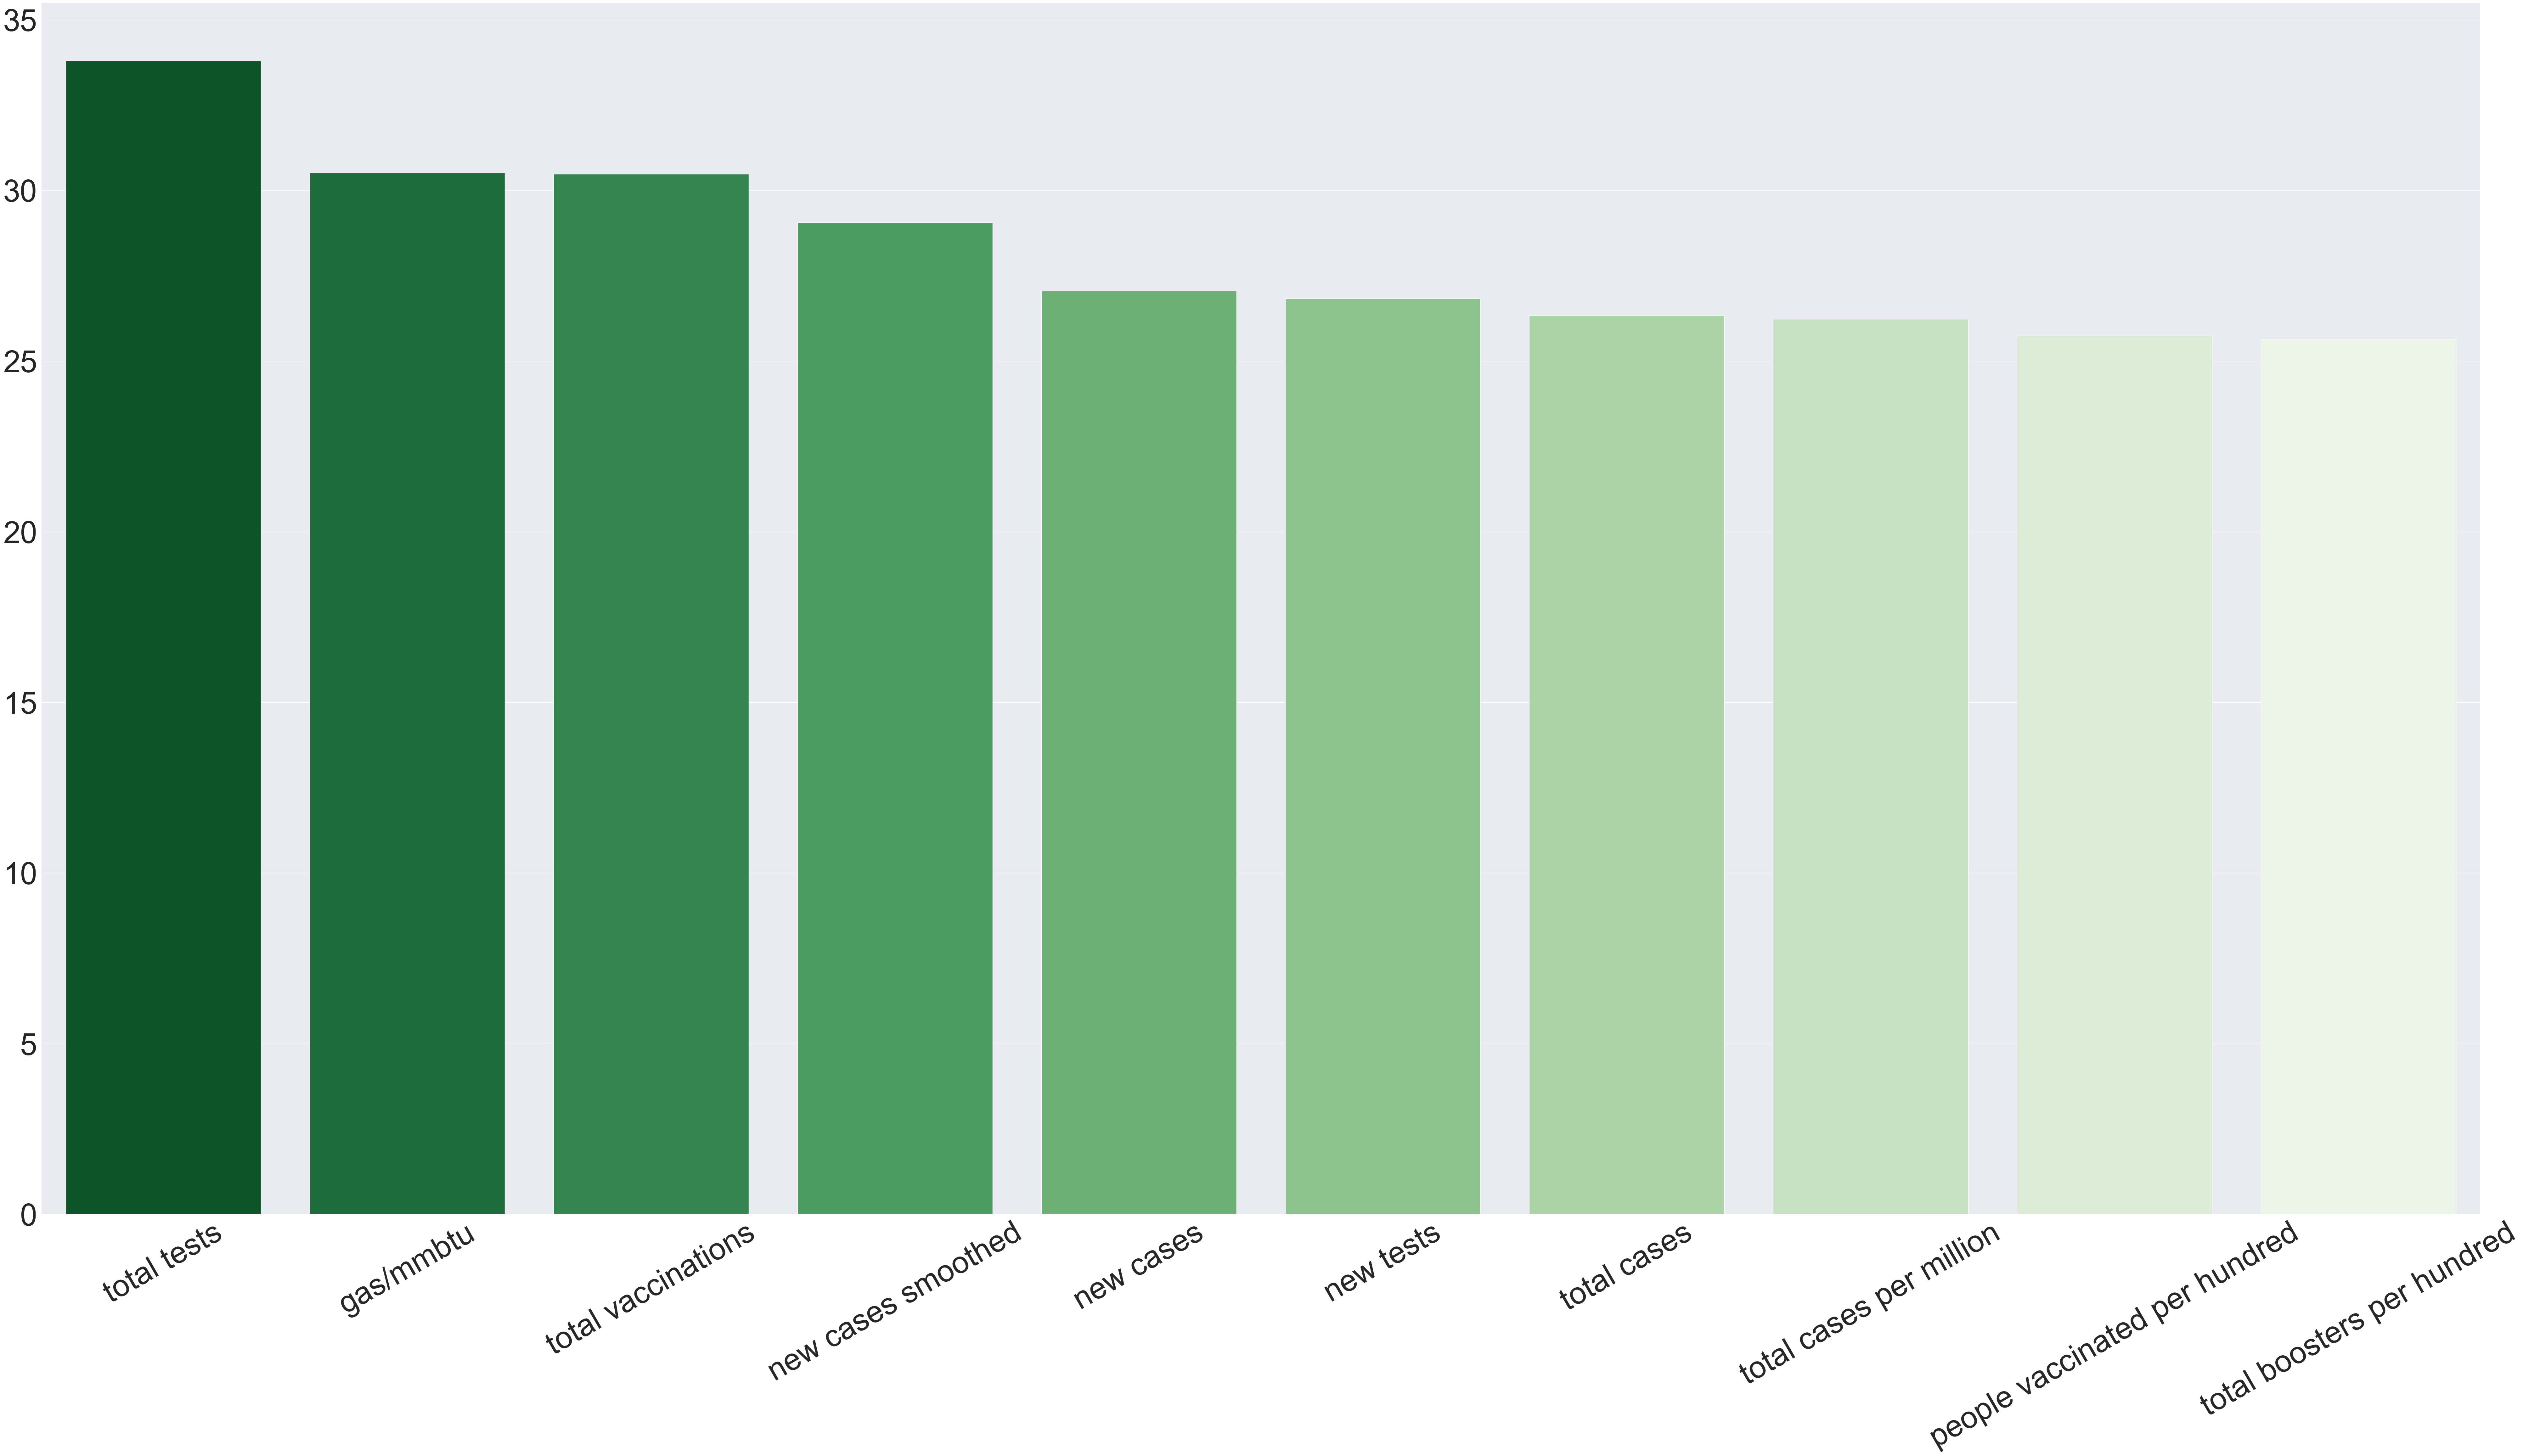

In [5]:
nba=hasil
nba=np.sum(nba,axis=2)/3.0
nba2=np.sum(nba,axis=1)/60*100
nba=pd.DataFrame(nba)

labels = ['jii', 'vol jii', 'ihsg', 'vol ihsg', 'usd', 'eur', 'gold/gr', 'silver/gr', 'oil/bbl', 'gas/mmbtu',
          'total cases', 
          'new cases', 'new cases smoothed', 
          'total deaths', 'new deaths', 'new deaths smoothed', 'total cases per million', 
          'new cases per million', 'new cases smoothed per million', 
          'total deaths per million', 'new deaths per million', 'new deaths smoothed per million', 'reproduction rate', 
          'total tests', 'new tests', 'total tests per thousand', 'new tests per thousand', 'new tests smoothed', 'new tests smoothed per thousand', 
          'positive rate', 'tests per case', 'total vaccinations', 'people vaccinated', 'people fully vaccinated', 'total boosters', 'new vaccinations', 
          'new vaccinations smoothed', 'total vaccinations per hundred', 'people vaccinated per hundred', 'people fully vaccinated per hundred', 
          'total boosters per hundred', 'new vaccinations smoothed per million', 'new people vaccinated smoothed', 
          'new people vaccinated smoothed per hundred', 'stringency index']

a=original.index[-60:].to_numpy() # Index from dataset
a=np.datetime_as_string(a, unit='D')
nba.columns = a

# Attention Plot
sns.set(font_scale=4.0)
sns.set_style({"savefig.dpi": 300})
ax = sns.heatmap(nba,  vmin=0.0, vmax=1.0, yticklabels=labels,cmap='jet', linewidths=.1)
ax.xaxis.tick_top()
plt.xticks(rotation=30)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
fig = ax.get_figure()
fig.set_size_inches(125, 75)
fig.savefig(f"Result/Grad-CAM/Aggregation Attention.png")

# Rank Plot
plt.figure(figsize=(16,9))
ax2=sns.barplot(x=np.array(labels)[np.argsort(-nba2)[0:10]], y=-np.sort(-nba2)[0:10], palette='Greens_r')
fig2 = ax2.get_figure()
plt.xticks(rotation=30)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
fig2.set_size_inches(100, 50)
fig2.savefig(f"Result/Grad-CAM/Rank All.png")

# Take Features Whose Value is Greater Than or Equal to 0.5

## Load Npy File

In [3]:
array_grad10 = np.load("Result/Grad-CAM/cam_array_10_post.npy")
array_grad10 = np.mean(array_grad10, axis=(2))
array_grad36 = np.load("Result/Grad-CAM/cam_array_36_post.npy")
array_grad36 = np.mean(array_grad36, axis=(2))
array_grad41 = np.load("Result/Grad-CAM/cam_array_41_post.npy")
array_grad41 = np.mean(array_grad41, axis=(2))
array_grad45 = np.load("Result/Grad-CAM/cam_array_45_post.npy")
array_grad45 = np.mean(array_grad45, axis=(2))
array_grad10.shape , array_grad36.shape, array_grad41.shape, array_grad45.shape

((10, 60), (36, 60), (41, 60), (45, 60))

## Take The Feature

In [5]:
indek10 = []
for i in range(10):
    jumlah = 0
    for j in range(60):
        if array_grad10[i][j]>=0.5:
            jumlah +=1
    if jumlah != 0:
        indek10.append(i)
print(indek10)

[8]


In [6]:
indek36 = []
for i in range(36):
    jumlah = 0
    for j in range(60):
        if array_grad36[i][j]>=0.5:
            jumlah +=1
    if jumlah != 0:
        indek36.append(i)
print(indek36)

[15]


In [7]:
indek41 = []
for i in range(41):
    jumlah = 0
    for j in range(60):
        if array_grad41[i][j]>=0.5:
            jumlah +=1
    if jumlah != 0:
        indek41.append(i)
print(indek41)

[5, 27]


In [8]:
indek45 = []
for i in range(45):
    jumlah = 0
    for j in range(60):
        if array_grad45[i][j]>=0.5:
            jumlah +=1
    if jumlah != 0:
        indek45.append(i)
print(indek45)

[9, 10, 23, 24]


In [20]:
column_names = ['jii', 'vol jii', 'ihsg', 'vol ihsg', 'usd', 'eur', 'gold/gr', 'silver/gr', 'oil/bbl', 'gas/mmbtu',
          'total cases', 
          'new cases', 'new cases smoothed', 
          'total deaths', 'new deaths', 'new deaths smoothed', 'total cases per million', 
          'new cases per million', 'new cases smoothed per million', 
          'total deaths per million', 'new deaths per million', 'new deaths smoothed per million', 'reproduction rate', 
          'total tests', 'new tests', 'total tests per thousand', 'new tests per thousand', 'new tests smoothed', 'new tests smoothed per thousand', 
          'positive rate', 'tests per case', 'total vaccinations', 'people vaccinated', 'people fully vaccinated', 'total boosters', 'new vaccinations', 
          'new vaccinations smoothed', 'total vaccinations per hundred', 'people vaccinated per hundred', 'people fully vaccinated per hundred', 
          'total boosters per hundred', 'new vaccinations smoothed per million', 'new people vaccinated smoothed', 
          'new people vaccinated smoothed per hundred', 'stringency index']
kolom10 = np.concatenate([column_names[0:1],column_names[1:10]])
kolom36 = np.concatenate([column_names[0:1],column_names[10:45]])
kolom_hapus = ['new cases', 'new cases smoothed', 'new cases per million','new cases smoothed per million']
kolom41 = [column for column in column_names if column not in kolom_hapus]
kolom45 = column_names

In [23]:
list_kolom = []
for i in indek10:
    print(f"Kolomnya adalah: {kolom10[i]}")
    list_kolom.append(kolom10[i])
for i in indek36:
    print(f"Kolomnya adalah: {kolom36[i]}")
    list_kolom.append(kolom36[i])
for i in indek41:
    print(f"Kolomnya adalah: {kolom41[i]}")
    list_kolom.append(kolom41[i])
for i in indek45:
    print(f"Kolomnya adalah: {kolom45[i]}")
    list_kolom.append(kolom45[i])
list_kolom = list(set(list_kolom))
print(list_kolom)
list_as_string = ', '.join(map(str, list_kolom))

print(list_as_string)

Kolomnya adalah: oil/bbl
Kolomnya adalah: new tests
Kolomnya adalah: eur
Kolomnya adalah: total vaccinations
Kolomnya adalah: gas/mmbtu
Kolomnya adalah: total cases
Kolomnya adalah: total tests
Kolomnya adalah: new tests
['total cases', 'oil/bbl', 'new tests', 'total vaccinations', 'gas/mmbtu', 'eur', 'total tests']
total cases, oil/bbl, new tests, total vaccinations, gas/mmbtu, eur, total tests


In [24]:
for i in list_kolom:
    print(i)

total cases
oil/bbl
new tests
total vaccinations
gas/mmbtu
eur
total tests


In [25]:
len(list_kolom)

7